In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


In [4]:
df_train.drop('id', axis = 1, inplace = True)
df_test.drop('id', axis = 1, inplace = True)

In [5]:
for column in df_train.isna().sum()[df_train.isna().sum()>0].index:
    elements = df_train[column].dropna().unique()
    proba = [df_train[column].value_counts()[i]/len(df_train[column].dropna()) for i in elements]
    df_train[column].fillna(np.random.choice(a=elements, p = proba), inplace = True)

In [6]:
for column in df_test.isna().sum()[df_test.isna().sum()>0].index:
    elements = df_test[column].dropna().unique()
    proba = [df_test[column].value_counts()[i]/len(df_test[column].dropna()) for i in elements]
    df_test[column].fillna(np.random.choice(a=elements, p = proba), inplace = True)

In [7]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [8]:
for column in df_test.columns:
    if df_test[column].dtype == object:
        label = LabelEncoder()
        df_train[column] = label.fit_transform(df_train[column])
        df_test[column] = label.transform(df_test[column])

<Axes: xlabel='Time_spent_Alone'>

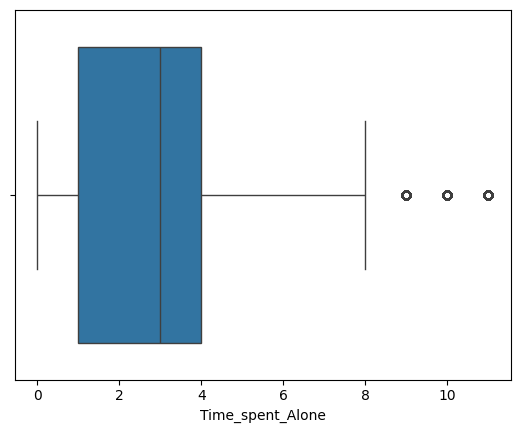

In [9]:
sns.boxplot(x=df_train['Time_spent_Alone'])

In [10]:
df_train['Time_spent_Alone'][df_train['Time_spent_Alone']>8] = df_train['Time_spent_Alone'].mean()

In [11]:
model = SVC()

In [12]:
scaler = StandardScaler()

In [13]:
params = {
    'model__C' : [1, 5,10],
    'model__kernel' : ['linear', 'poly', 'rbf', 'sigmoid' ],
    'model__gamma' : ['scale', 'auto']
}

In [14]:
pipe = Pipeline([('scaler', scaler), ('model', model)])

In [15]:
final_model = GridSearchCV(pipe, param_grid = params, cv = 3, verbose = 2)

In [16]:
X_train = df_train.drop('Personality', axis=1)
X_test = df_test.copy()
y_train = df_train['Personality']

In [17]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [18]:
final_model.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END model__C=1, model__gamma=scale, model__kernel=linear; total time=   1.5s
[CV] END model__C=1, model__gamma=scale, model__kernel=linear; total time=   1.3s
[CV] END model__C=1, model__gamma=scale, model__kernel=linear; total time=   1.3s
[CV] END .model__C=1, model__gamma=scale, model__kernel=poly; total time=   6.6s
[CV] END .model__C=1, model__gamma=scale, model__kernel=poly; total time=   3.4s
[CV] END .model__C=1, model__gamma=scale, model__kernel=poly; total time=   3.7s
[CV] END ..model__C=1, model__gamma=scale, model__kernel=rbf; total time=   1.8s
[CV] END ..model__C=1, model__gamma=scale, model__kernel=rbf; total time=   2.0s
[CV] END ..model__C=1, model__gamma=scale, model__kernel=rbf; total time=   2.0s
[CV] END model__C=1, model__gamma=scale, model__kernel=sigmoid; total time=   1.4s
[CV] END model__C=1, model__gamma=scale, model__kernel=sigmoid; total time=   1.5s
[CV] END model__C=1, model__gamma=scale, 

,estimator,"Pipeline(step...del', SVC())])"
,param_grid,"{'model__C': [1, 5, ...], 'model__gamma': ['scale', 'auto'], 'model__kernel': ['linear', 'poly', ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [19]:
final_model.best_params_

{'model__C': 1, 'model__gamma': 'scale', 'model__kernel': 'linear'}

In [20]:
y_pred = final_model.predict(X_val)

In [21]:
print(classification_report(y_pred, y_val))

              precision    recall  f1-score   support

   Extrovert       0.98      0.98      0.98      2770
   Introvert       0.93      0.95      0.94       935

    accuracy                           0.97      3705
   macro avg       0.96      0.96      0.96      3705
weighted avg       0.97      0.97      0.97      3705



In [22]:
finaly_y = final_model.predict(X_test)

In [23]:
df_sub = pd.read_csv('sample_submission.csv')

In [24]:
df_sub

,id,Personality
0,18524,Extrovert
1,18525,Extrovert
2,18526,Extrovert
3,18527,Extrovert
4,18528,Extrovert
...,...,...
6170,24694,Extrovert
6171,24695,Extrovert
6172,24696,Extrovert
6173,24697,Extrovert


In [25]:
df_sub['Personality'] = finaly_y

In [26]:
df_sub

,id,Personality
0,18524,Extrovert
1,18525,Introvert
2,18526,Extrovert
3,18527,Extrovert
4,18528,Introvert
...,...,...
6170,24694,Extrovert
6171,24695,Introvert
6172,24696,Extrovert
6173,24697,Extrovert


In [27]:
df_sub.to_csv('sub.csv', index=False, index_label=False)